In [ ]:
# Exercise 2.3 Monte Carlo Fehlerfortpflanzung - Teil 1

In [30]:
from matplotlib import pyplot as plt
from scipy.stats import norm
import numpy as np
import math

In [31]:
%matplotlib notebook

In [32]:
# Variablen

# Gravitational constant
g = 6.67384*pow(10, -11)

# First Mass
m1 = 40*pow(10, 4)

# Second Mass
m2 = 30*pow(10, 4)

# Radius
r = 3.2

# Measurement error of the first mass
m1_error = 0.05*pow(10, 4)

# Measurement error of the second mass
m2_error = 0.1*pow(10, 4)

# Measurement error of the radius
r_error = 0.01

# Error limits of the first Mass
m1_lower_limit = m1 - m1_error
m1_upper_limit = m1 + m1_error

# Error limits of the second Mass
m2_lower_limit = m2 - m2_error
m2_upper_limit = m2 + m2_error

# Error limits of the second radius
r_lower_limit = r - r_error
r_upper_limit = r + r_error


f = (g*m1*m2)/r**2

In [33]:
# Gaussche Fehlerfortplanzung

# Solution without the Errors
f = (g*m1*m2)/r**2

# partial derivative of the first Mass
derivation_m1 = (g*m2)/r**2
#ableitung_m1
derivation_m1_error = (derivation_m1*m1_error)**2
#ableitung_m1_Fehler

# partial derivative of the second Mass
derivation_m2 = (g*m1)/r**2
#ableitung_m2
derivation_m2_error = (derivation_m2*m2_error)**2
#ableitung_m2_Fehler

# partial derivative of the Raidus
derivation_r = (-2*g*m1*m2)/r**3
#ableitung_r
derivation_r_error = (derivation_r*r_error)**2
#ableitung_r_Fehler

In [34]:
solution_gauss = math.sqrt(derivation_m1_error + derivation_m2_error + derivation_r_error)
#solution_gauss
print("Die Gravitationskraft ist: " , round(f, 3) , u'\u00b1' , round(solution_gauss, 3), "N")

Die Gravitationskraft ist:  0.782 ± 0.006 N


In [35]:
# Monte Carlo Mathode

# Function for a list of random values in the error limits
def random_number(size, lower_limit, upper_limit):
    numList = []
    numList=(np.random.uniform(lower_limit, upper_limit,size))    
    return numList

# List of random limits for the first mass
list_m1 = random_number(1_000_000, m1_lower_limit, m1_upper_limit)

# List of random limits for the second mass
list_m2 = random_number(1_000_000, m2_lower_limit, m2_upper_limit)

# List of random limits for the radius
list_r = random_number(1_000_000, r_lower_limit, r_upper_limit)


In [36]:
# List of the solutions for the gravitational force
solutions = (g*list_m1*list_m2)/list_r**2

<IPython.core.display.Javascript object>


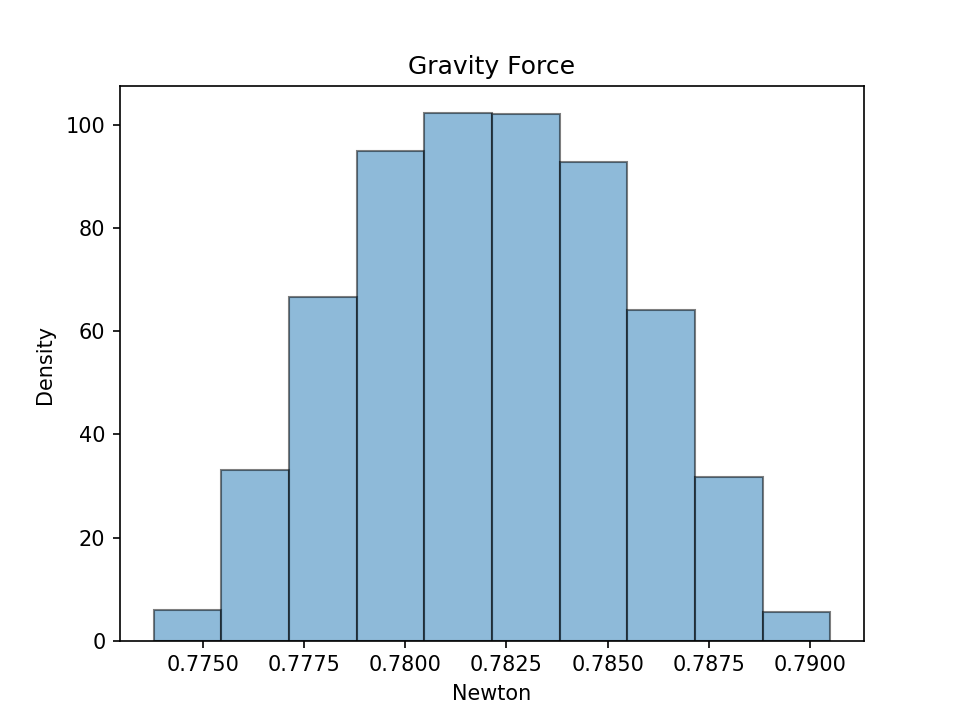

In [38]:
# Plot of all solutions
plt.hist(solutions, edgecolor='black', alpha=.5, density=True)
plt.title("Gravity Force")
plt.xlabel("Newton")
plt.ylabel("Density ")
plt.show()

In [39]:
std = np.std(solutions, ddof=1)
mean = np.mean(solutions)

<IPython.core.display.Javascript object>


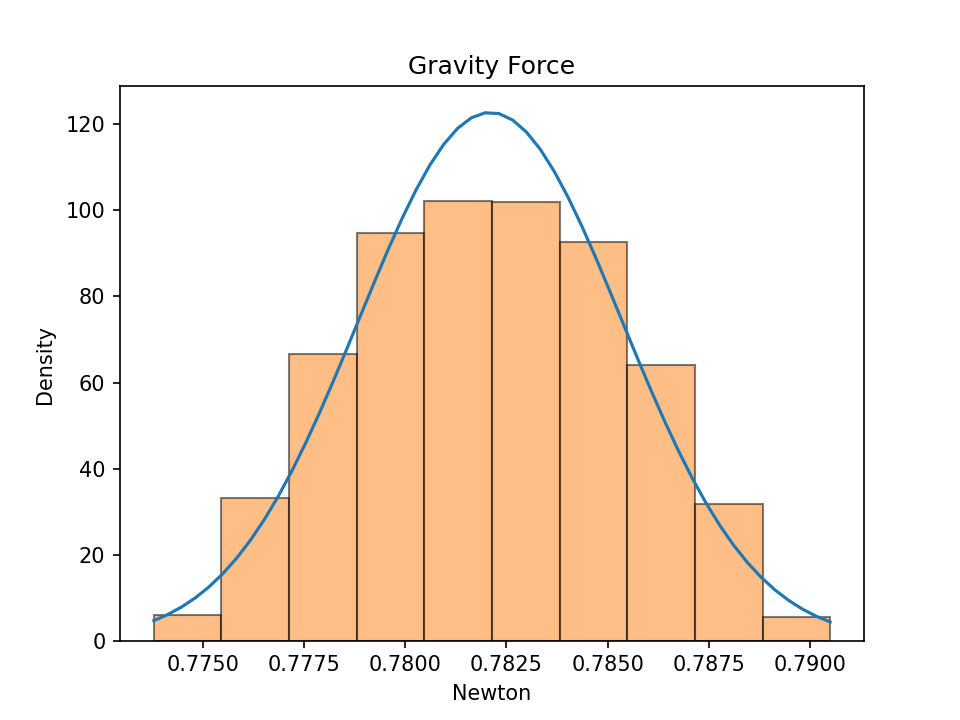

In [40]:
# Plot of all solutions with the Normal distribution
domain = np.linspace(np.min(solutions), np.max(solutions))
plt.plot(domain, norm.pdf(domain,mean,std))
plt.hist(solutions, edgecolor='black', alpha=.5, density=True)
plt.title("Gravity Force")
plt.xlabel("Newton")
plt.ylabel("Density ")
plt.show()